In [1]:
##########################
### [작업1]
### 코렙에서 차트작업시 한글 나오게 하는 작업임
### 이노트 실행후, [런타임-세션다시시작]하고,이 작업1은 다시 실행하지 않아도 됨
### 아래의 [작엄2] 에서 한글 잘 나오면 됨
#########################
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,776 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

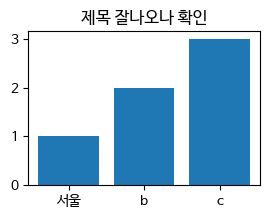

In [1]:
##################################
## [작업2] 한글 차트 한글 잘 나오나 확인용
###################################
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(3,2))
plt.title('제목 잘나오나 확인')
plt.bar(x=['서울','b','c'], height=[1,2,3])
plt.show()

In [2]:
#####################################3
## 설치
############################
!pip install --upgrade openai
!pip install langchain_community
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.4
    Uninstalling openai-1.54.4:
      Successfully uninstalled openai-1.54.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uni

In [ ]:
#########################################
## 오픈 API키
##########################################
from langchain_openai import ChatOpenAI
import os
openai_api_key = '오픈api키 넣으셔요'
os.environ['OPENAI_API_KEY'] = openai_api_key

In [5]:
import pandas as pd

# 데이터 로드
data = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", None],
    "Age": [25, 30, None, 28],
    "Score": [85, 90, 95, None],
    "gender": ["F", "M", "M", "F"]
})

data

,Name,Age,Score,gender
0,Alice,25.0,85.0,F
1,Bob,30.0,90.0,M
2,Charlie,NaN,95.0,M
3,None,28.0,NaN,F


In [25]:
import pandas as pd
from langchain.memory import ConversationBufferMemory
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# 데이터 로드 및 결측치 처리
data = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", None],
    "Age": [25, 30, None, 28],
    "Score": [85, 90, 95, None],
    "Gender": ["F", "M", "M", "F"]
})

# 결측치 처리
data['Name'] = data['Name'].fillna("Unknown")
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Score'] = data['Score'].fillna(data['Score'].mean())

print("결측치 처리 후 데이터:")
print(data)


결측치 처리 후 데이터:
      Name        Age  Score Gender
0    Alice  25.000000   85.0      F
1      Bob  30.000000   90.0      M
2  Charlie  27.666667   95.0      M
3  Unknown  28.000000   90.0      F


In [27]:
# LangChain 및 메모리 설정
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.7, max_tokens=256)
memory = ConversationBufferMemory()

# 프롬프트 템플릿
prompt = PromptTemplate(
    template="데이터를 분석하고 인사이트를 도출하세요: {stats}\n이전 작업 내용: {history}"
)

# LangChain 체인 생성
chain = LLMChain(llm=llm, prompt=prompt, memory=memory)


In [28]:
# 기술 통계 계산
stats = data.describe()

print("\n기술 통계:")
print(stats)



기술 통계:
             Age      Score
count   4.000000   4.000000
mean   27.666667  90.000000
std     2.054805   4.082483
min    25.000000  85.000000
25%    27.000000  88.750000
50%    27.833333  90.000000
75%    28.500000  91.250000
max    30.000000  95.000000


In [29]:
# LangChain으로 요약 요청
summary = chain.run(stats=stats.to_string())
print("\nLangChain 기술 통계 요약:")
print(summary)



LangChain 기술 통계 요약:
주어진 데이터를 살펴본 결과, 총 4명의 개체에 대한 연령과 점수 데이터가 주어졌습니다. 

평균 연령은 약 27.7세이며, 평균 점수는 90점입니다. 연령의 표준편차는 2.05로 점수의 표준편차는 4.08입니다. 

가장 어린 개체는 25세이고, 가장 연장된 개체는 30세입니다. 각각의 25%, 50%, 75%의 백분위수를 살펴보면, 대부분의 개체가 27세에서 28세 사이에 위치하고 있습니다. 

또한 점수에 대해서는 85에서 95 사이의 범위를 가지며, 대부분의 개체가 88.75에서 91.25 사이에 위치해 있습니다. 

이 정보를


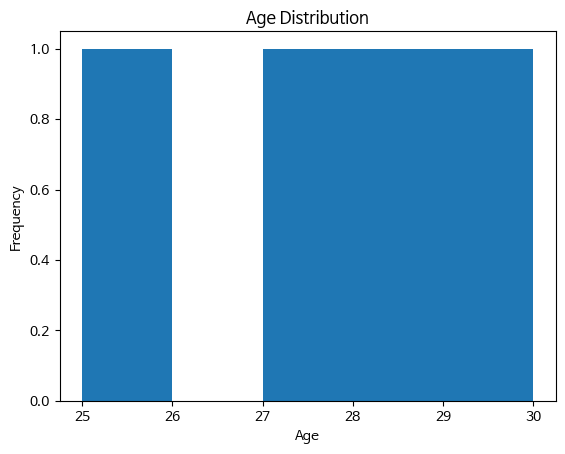

In [30]:
import matplotlib.pyplot as plt

# 히스토그램: Age
data['Age'].plot(kind='hist', title='Age Distribution', bins=5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [31]:
# LangChain으로 시각화 설명 요청
visual_summary = chain.run(stats="Age의 분포를 보여주는 히스토그램입니다. X축은 나이, Y축은 빈도를 나타냅니다.")
print("\nLangChain 시각화 설명:")
print(visual_summary)



LangChain 시각화 설명:
 바탕으로, 주어진 데이터셋의 대부분의 개체들이 비교적 젊은 연령대에 속하고, 대체로 높은 점수를 받고 있는 것으로 보입니다. 또한, 연령과 점수 간에는 어떤 상관관계가 있는지 분석해 볼 필요가 있을 것으로 보입니다. 또한, 데이터셋이 작기 때문에 추가적인 데이터 수집이나 분석이 필요할 수 있습니다.


In [32]:
# 요약된 데이터에서 인사이트 도출 요청
insight_summary = chain.run(stats="데이터를 분석하여 주요 인사이트를 도출해 주세요.")
print("\nLangChain 데이터 인사이트:")
print(insight_summary)



LangChain 데이터 인사이트:


특히 연령과 점수 간의 상관관계를 분석해보면, 젊은 연령대일수록 높은 점수를 받는 경향이 있는지, 또는 연령이 높아질수록 점수가 더 높아지는지 등을 확인해 볼 수 있습니다. 또한, 추가적인 데이터 수집을 통해 보다 신뢰할 수 있는 인사이트를 도출할 수 있을 것입니다.


In [33]:
# 히스토리 출력
print("\nLangChain 히스토리 내용:")
print(memory.load_memory_variables({})['history'])



LangChain 히스토리 내용:
Human:              Age      Score
count   4.000000   4.000000
mean   27.666667  90.000000
std     2.054805   4.082483
min    25.000000  85.000000
25%    27.000000  88.750000
50%    27.833333  90.000000
75%    28.500000  91.250000
max    30.000000  95.000000
AI: 주어진 데이터를 살펴본 결과, 총 4명의 개체에 대한 연령과 점수 데이터가 주어졌습니다. 

평균 연령은 약 27.7세이며, 평균 점수는 90점입니다. 연령의 표준편차는 2.05로 점수의 표준편차는 4.08입니다. 

가장 어린 개체는 25세이고, 가장 연장된 개체는 30세입니다. 각각의 25%, 50%, 75%의 백분위수를 살펴보면, 대부분의 개체가 27세에서 28세 사이에 위치하고 있습니다. 

또한 점수에 대해서는 85에서 95 사이의 범위를 가지며, 대부분의 개체가 88.75에서 91.25 사이에 위치해 있습니다. 

이 정보를
Human: Age의 분포를 보여주는 히스토그램입니다. X축은 나이, Y축은 빈도를 나타냅니다.
AI:  바탕으로, 주어진 데이터셋의 대부분의 개체들이 비교적 젊은 연령대에 속하고, 대체로 높은 점수를 받고 있는 것으로 보입니다. 또한, 연령과 점수 간에는 어떤 상관관계가 있는지 분석해 볼 필요가 있을 것으로 보입니다. 또한, 데이터셋이 작기 때문에 추가적인 데이터 수집이나 분석이 필요할 수 있습니다.
Human: 데이터를 분석하여 주요 인사이트를 도출해 주세요.
AI: 

특히 연령과 점수 간의 상관관계를 분석해보면, 젊은 연령대일수록 높은 점수를 받는 경향이 있는지, 또는 연령이 높아질수록 점수가 더 높아지는지 등을 확인해 볼 수 있습니다. 또한, 추가적인 데이터 수집을 통해 보다 신뢰할 수 있는 인사이트를 도출할 수 있을 것입